# Constant sum AMM

## What is constant sum AMM?

We are going to use the following variables:

```
x = Amount of Token X in the pool (P1)
y = Amount of Token Y in the pool (P2)
Ax = Amount of Token X the trader has in their wallet (A1)
Ay = Amount of Token Y the trader has in their wallet (A2)
Sp = for the total shares in the pool (SP)
Sa = for the total shares held by the agent (SA)

```
![title](img/amm_variables.png)

It's often helpful to plot relationships between amount of Token X and amount of Token Y on an x-y plane. Let's examine that more deeply. 

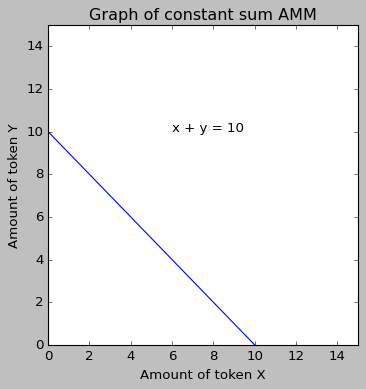

In [1]:
# some libraries needed for later use
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')

plt.figure(figsize=(5,5))

plt.title("Graph of constant sum AMM")

plt.xlabel("Amount of token X")
plt.ylabel("Amount of token Y")

k = 10
x = np.linspace(0, 10, 100)
y = k - x

plt.axis([0,15, 0, 15])
plt.text(6, 10, "x + y = 10")

plt.plot(x, y)

In [32]:
# Suppose the pool initially consists of 10 Token X and 20 Token Y, and after a trade it consists of 25 Token X and 8 Token Y.
X = 10
Y = 20

# after a trade it changes to:
dX = 25
dY = 8

# The price (and the slope) would be -(20-8)/(10-25) = 0.8 Token X per Token Y.
price = -(Y - dY)/(X - dX)
print(price)

0.8


It means a price of 0.8 Token X per each Token Y.

We can visualize this movement by drawing a line segment between the points (10,20) and (25,8).

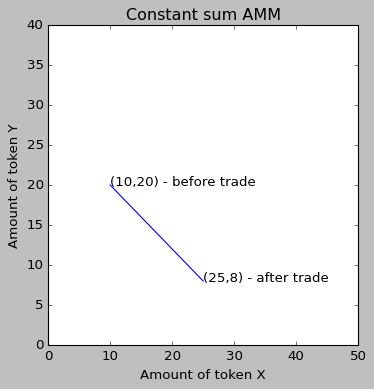

In [44]:
plt.figure(figsize=(5,5))

plt.title("Constant sum AMM")

plt.xlabel("Amount of token X")
plt.ylabel("Amount of token Y")

plt.axis([0,50, 0, 40])


plt.text(X,Y, "("+str(X)+","+str(Y)+") - before trade")
plt.text(dX,dY,"("+str(dX)+","+str(dY)+") - after trade")

plt.plot([X, dX], [Y, dY])

The problem with this approach is that it is so easy to end without one of the tokens of the pool due to the trading activity. By this reason, a good measure to minimize this effect would be to introduce weights and to correct the weights depending on the tokens demand:

![title](img/weighted_constant_sum_amm.png)

If we are getting short of X tokens (green point), then we change the formula from x+y=k to x+2y=k. This means y become cheaper.

If we are getting short of Y tokens (red point), then we change the formula from x+y=k to 2x+y=k. This means x become cheaper.

Changing the slope dinamically is a good measure but it requires constant manipulation and it is not scalable. The goal is to be able to set a price so that the slope is equal to the market price which reflects demand, which is not an easy task.


We are going to add some code for helping you understand the behaviour of the const sum AMM and perform some calculations

In [ ]:
# TODO